Diagnóstico de modelos usando StatsModels
===

* *60 min* | Ultima modificación: Junio 22, 2019

## Preparación

In [1]:
##
## Preparación
##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import scipy
import statsmodels
print(scipy.__version__)
print(statsmodels.__version__)

1.3.0
0.10.0


## Datos

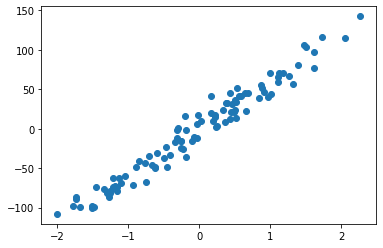

In [3]:
from sklearn.datasets import make_regression

X, d = make_regression(
    n_samples=100,         #
    n_features=1,          #
    n_informative=1,       #
    bias=0.0,              # intercepto
    effective_rank=None,   # numero de vectores singulares para explicar los datos
    tail_strength=0.9,     # ? importancia relativa de las colas
    noise=12.0,            #
    shuffle=False,         # ?
    coef=False,            # ?coeficientes de la regresion 
    random_state=12136)    #

plt.scatter(X, d);

## Estimación del modelo

In [4]:
##
## A partir de las matrices X y d
##
import statsmodels.api as sm

model = sm.OLS(d, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              2532.
Date:                Fri, 12 Jul 2019   Prob (F-statistic):                    2.53e-72
Time:                        01:28:29   Log-Likelihood:                         -385.32
No. Observations:                 100   AIC:                                      772.6
Df Residuals:                      99   BIC:                                      775.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [5]:
##
## Regresión usando statsmodels con formulas como en R
##

import statsmodels.formula.api as smf

## crea un dataframe
df = pd.DataFrame(
    X, 
    columns=['x'])
df['d'] = d

## Estimación
model = smf.ols(formula='d ~ x', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      d   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     2502.
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           1.41e-71
Time:                        01:28:29   Log-Likelihood:                -385.26
No. Observations:                 100   AIC:                             774.5
Df Residuals:                      98   BIC:                             779.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3900      1.153     -0.338      0.7

## Diagnóstico

En la especificación de un modelo se debe verificar lo siguiente:


* Los parámetros del modelo $w_0$ y $w_1$ deben ser estadísticamente diferentes de cero.


* La distribución de los errores $e$ debe ser normal.


* La varianza de los errores $\sigma^2$ debe ser constante.


El no cumplimiento de estos supuestos indica que pueden haber problemas en la especificación del modelo o en los datos.

## Valores relevantes

### Estadístico F

En la tabla, es de particular interés el estadístico F. La hipótesis nula es que todos los parámetros del modelo ($w_0$ y $w_1$) son diferentes de cero, versus la hipótesis alterna en que se indica que al menos uno de ellos no es significativamente de cero.     
     

### Coeficientes de la regresión
    
En esta fase se verifica los coeficientes sean significativamente diferentes de cero. Ya que el valor esperado de cada parámetro $w_i$ es desconocido, se verifica contra el supuesto de que su valor sea cero; así, se plantea la siguiente prueba de hipótesis:

* $H_0$: $w_i=0$
* $H_a$: $w_i \ne 0$

suponiendo que la distribución de $w_i$ es normal. Ya que en la práctica hay pocos datos, se reemplaza la normal por la distribución t de Student. La última columna representa la probabilidad de que el valor del parámetro sea cero; es decir, es una prueba de hipótesis usando valores-$p$.

In [6]:
##
## Valores de los parámetros
##
results.params

Intercept    -0.390032
x            59.274259
dtype: float64

In [7]:
##
## Errores estándar
## 
results.bse

Intercept    1.152827
x            1.184968
dtype: float64

### Coeficiente de determinación

El coeficiente de determinación mide cuanta de la variación de $y$ es explicada por el modelo. Se calcula como:

$$R^2 = 1 - \frac{\sigma_e^2}{\sigma_y^2}$$

Si la varianza de los errores o residuales $\sigma_e^2$ es cero, el modelo explica el 100% de la variable $y$. Si $\sigma_e^2$ es igual a la varianza de $y$ el modelo no explica nada y $R^2$ vale cero.

### Coeficiente de correlación ajustado

El coeficiente de correlación ajustado $\bar{R}^2$ corrige el valor de $R^2$ por la cantidad de variables $k$ (igual a 2 para el caso analizado) y la cantidad de datos $N$:

$$R^2_{\text{Ajustado}} = 1 - \frac{N-1}{N-k-1}(1-R^2)$$

In [8]:
##
## R2
##
results.rsquared

0.9623103703648292

In [9]:
##
## Valores pronósticados
##
results.predict()

array([  -4.8641841 ,   14.69999471,  -99.84658374,    1.34936759,
        -75.08477758,  -70.33333011,   74.36477568,  -27.04768283,
         25.75933363,   23.08076632,   -2.48869429,  134.3668712 ,
         30.18476404,   95.85117818,    9.63432755,   -1.10944946,
        -18.40499472,  -69.1329408 ,   13.2609048 ,  -75.71603408,
        -89.77536894,  -55.84721595,  -86.52962821,   34.44078592,
         28.38266766,   49.9663123 ,   65.58177882, -103.51898067,
        -15.29397954,  -62.66798583,  -18.62457752,   21.70539802,
         30.81255241,  -79.63925355,  -39.54556003,  -36.81028591,
        -87.96170806,   69.59475048,   57.12959558,  -89.69498628,
         51.36484553,   -5.94508383,  -11.06074583,  121.60334338,
        -45.21745806,   52.27883148,   10.86682761,  -20.27901048,
         12.93267352,   26.08157259,   29.52630151,  -37.35218691,
        -11.58004287,   13.55148933,  -69.27296914,  -35.87093349,
        -18.95597667,   66.26373212,   37.85593607,  -28.28777

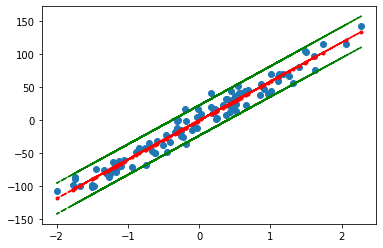

In [10]:
##
## Gráfico del pronóstico
##

from statsmodels.sandbox.regression.predstd import wls_prediction_std

mean_pred, lower, upper = wls_prediction_std(results)

plt.plot(X, d, 'o', label="data")
plt.plot(X, results.fittedvalues, 'r--.', label="OLS")
plt.plot(X, upper, 'g--')
plt.plot(X, lower, 'g--');

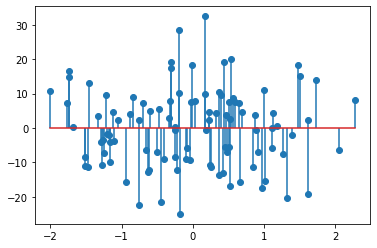

In [11]:
##
## Gráfico de residuos
##
plt.stem(X, results.resid, use_line_collection=True);

In [12]:
##
## Normalidad de los residuos
##
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 0.7561689887942866),
 ('Chi^2 two-tail prob.', 0.6851726049737776),
 ('Skew', 0.17979614177190884),
 ('Kurtosis', 2.771583829542715)]

In [13]:
##
## Breush-Pagan test
##
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 0.5025220538227959),
 ('p-value', 0.47839404487321224),
 ('f-value', 0.4949588903275937),
 ('f p-value', 0.4833917275203843)]

In [14]:
##
## Goldfeld-Quandt test
##
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

[('F statistic', 0.8929831528098182), ('p-value', 0.6517143645705812)]

## Opcional --- Resultados usando el lenguaje R

In [15]:
%load_ext rpy2.ipython

In [16]:
%%R -i df
head(df)

            x          d
0 -0.07548221 -10.578417
1  0.25457976   3.454003
2 -1.67790459 -99.604299
3  0.02934494   9.184315
4 -1.26015485 -78.670116
5 -1.17999447 -72.245923


In [17]:
%%R
##
## Se usa la función lm para estimar el modelo de
## regresión lineal.
##
m <- lm(d ~ x, data = df)

##
## Se imprimen los parámetros del modelo
##
m


Call:
lm(formula = d ~ x, data = df)

Coefficients:
(Intercept)            x  
      -0.39        59.27  



In [18]:
%%R
## 
## Se imprime un resumen del modelo estimado.
## El primer paso consiste en eliminar las variables 
## irrelevantes. En este caso, se eliminaría la variable
## `sexmale` (valor más alto de Pr(>|t|)) y se estimaría
## el modelo nuevamente. Se eliminaría la siguiente variable
## más irrelevante y así sucesivamente hasta que solo queden
## variables relevantes en el modelo
##
summary(m)


Call:
lm(formula = d ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.959  -8.595   0.200   7.687  32.454 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.390      1.153  -0.338    0.736    
x             59.274      1.185  50.022   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.52 on 98 degrees of freedom
Multiple R-squared:  0.9623,	Adjusted R-squared:  0.9619 
F-statistic:  2502 on 1 and 98 DF,  p-value: < 2.2e-16



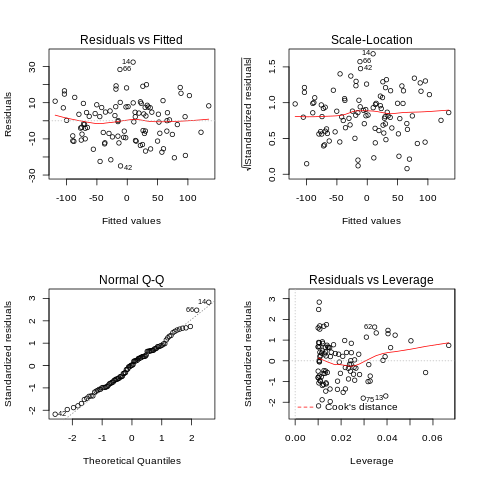

In [19]:
%%R
##
## Se construye una gráfica de 2x2
##
layout(matrix(c(1,2,3,4),2,2))

##
## Se realizan los gráficos de 
## dignóstico del modelo.
##
plot(m)

##
## El gráfico QQ muesta que el modelo
## no captura adecuadamente el comportamiento
## Los demás grafos corroboran esto.
##